# redo figure 6 GATAe plot with bootstrap and 84 peaks upper bound!

In [1]:
suppressPackageStartupMessages({
    library(monocle3)
    library(tidyverse)
    library(ggplot2)
    library(reshape2)
    library(viridis)
    library(philentropy)
library(cowplot)
library(ggrepel)
})

Warning message:
“package ‘S4Vectors’ was built under R version 4.1.3”


In [ ]:
load("data/utility.functions.RData")
load("data/moreUtilities.RData")
load("data/utility.functions.3.RData")

In [2]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Big Sur 10.16

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.1/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.1/Resources/lib/libRlapack.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] ggrepel_0.9.3               cowplot_1.1.1              
 [3] philentropy_0.7.0           viridis_0.6.3              
 [5] viridisLite_0.4.2           reshape2_1.4.4             
 [7] forcats_0.5.2               stringr_1.5.0              
 [9] dplyr_1.1.2                 purrr_1.0.1                
[11] readr_2.1.3                 tidyr_1.3.0                
[13] tibble_3.2.1                ggplot2_3.4.2              
[15] tidyverse_1.3.2             monocle3_1.3.1           

In [3]:
exp_matrix = read_tsv( "data/cds_fly_pca300_vers3.final.annotation.bootstrapTPM_renamed.tsv")

Rows: 13938 Columns: 83
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (83): Plasmatocytes_anlage, Ectoderm_AISN, Brain_and_ventral_nerve_cord_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [25]:
## This has lost the column names!
head(exp_matrix)

Plasmatocytes_anlage,Ectoderm_AISN,Brain_and_ventral_nerve_cord_1,Crystal_cell,Brain_and_ventral_nerve_cord_2,Sense_organs,Ventral_midline,Glutamatergic,Progenitor_cells_2,Cholinergic,⋯,Chordotonal_organ,Muscle_system_2,Salivary_gland_LS,Tracheal_system_3,unknown_5,Salivary_gland,Peptidergic_neuron,Germ_cells_testes,unknown_6,Epicuticle
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
15.241695,24.14500,74.59245,29.70623,56.657911,22.69280,14.834578,17.074740,94.58141,17.169612,⋯,21.62856,11.68572,41.89798,22.37504,54.27780,16.78895,42.0386,54.56579,0.00000,29.21273
580.910815,713.43372,1135.21335,329.41153,1283.186996,370.39666,419.684842,567.716250,1273.03428,730.362007,⋯,1471.89179,263.23349,1021.97848,401.48935,871.84311,525.21008,917.0983,697.40308,819.63023,435.79921
586.579637,524.80960,868.60631,464.63602,1005.481406,762.98100,528.719184,736.022175,1409.73679,727.118625,⋯,1920.91615,810.64477,1380.24216,643.19947,833.53693,604.55604,1130.8641,1018.59813,1044.84111,518.78156
1.901643,11.59448,14.72633,6.03493,5.687543,15.05588,9.123011,9.093051,13.83320,6.618154,⋯,0.00000,13.66594,31.58344,16.47155,36.72967,0.00000,16.1777,27.76737,32.23779,0.00000
422.262599,764.31727,398.48355,220.93375,380.597333,306.72750,749.147406,189.941713,236.82428,118.961675,⋯,27.72743,245.19624,195.71900,193.77366,130.12552,150.48913,211.9328,195.81789,62.62917,169.09956
15.231466,11.83073,22.34344,48.16927,14.994143,71.44697,16.898497,31.185646,42.63707,21.803211,⋯,36.51676,35.17008,167.35250,75.76537,36.43402,16.87607,109.2697,27.62698,63.46889,27.17836


## Get bootstrap matrix

In [26]:
exp_matrix_boot = read_tsv("data/cds_fly_pca300_vers3.final.annotation.bootstrapTPM.tsv")

Rows: 13938 Columns: 84
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): Gene
dbl (83): Plasmatocytes_anlage, Ectoderm_AISN, Brain_and_ventral_nerve_cord_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [27]:
head(exp_matrix_boot)

Gene,Plasmatocytes_anlage,Ectoderm_AISN,Brain_and_ventral_nerve_cord_1,Crystal_cell,Brain_and_ventral_nerve_cord_2,Sense_organs,Ventral_midline,Glutamatergic,Progenitor_cells_2,⋯,Chordotonal_organ,Muscle_system_2,Salivary_gland_LS,Tracheal_system_3,unknown_5,Salivary_gland,Peptidergic_neuron,Germ_cells_testes,unknown_6,Epicuticle
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
128up,15.241695,24.14500,74.59245,29.70623,56.657911,22.69280,14.834578,17.074740,94.58141,⋯,21.62856,11.68572,41.89798,22.37504,54.27780,16.78895,42.0386,54.56579,0.00000,29.21273
14-3-3epsilon,580.910815,713.43372,1135.21335,329.41153,1283.186996,370.39666,419.684842,567.716250,1273.03428,⋯,1471.89179,263.23349,1021.97848,401.48935,871.84311,525.21008,917.0983,697.40308,819.63023,435.79921
14-3-3zeta,586.579637,524.80960,868.60631,464.63602,1005.481406,762.98100,528.719184,736.022175,1409.73679,⋯,1920.91615,810.64477,1380.24216,643.19947,833.53693,604.55604,1130.8641,1018.59813,1044.84111,518.78156
140up,1.901643,11.59448,14.72633,6.03493,5.687543,15.05588,9.123011,9.093051,13.83320,⋯,0.00000,13.66594,31.58344,16.47155,36.72967,0.00000,16.1777,27.76737,32.23779,0.00000
18w,422.262599,764.31727,398.48355,220.93375,380.597333,306.72750,749.147406,189.941713,236.82428,⋯,27.72743,245.19624,195.71900,193.77366,130.12552,150.48913,211.9328,195.81789,62.62917,169.09956
26-29-p,15.231466,11.83073,22.34344,48.16927,14.994143,71.44697,16.898497,31.185646,42.63707,⋯,36.51676,35.17008,167.35250,75.76537,36.43402,16.87607,109.2697,27.62698,63.46889,27.17836


## fix the names in th matrix to match the target nemes

In [28]:
peak_matrix_ids = readRDS("data/fly_gene_name_translations.rds")

In [29]:
exp_matrix = left_join(exp_matrix_boot, peak_matrix_ids %>% select(Submitted_ID_matrix, FBID_key_matrix, Submitted_ID_peak), 
          by = c("Gene" = "Submitted_ID_matrix"))

In [30]:
exp_matrix = exp_matrix  %>% mutate(Submitted_combined = 
                            ifelse(is.na(exp_matrix$Submitted_ID_peak), Gene, Submitted_ID_peak)) 

In [31]:
exp_matrix = column_to_rownames(exp_matrix, var = "Submitted_combined")

In [32]:
exp_matrix$Submitted_ID_peak = NULL
exp_matrix$FBID_key_matrix = NULL
exp_matrix$Gene = NULL

In [33]:
head(exp_matrix)

,Plasmatocytes_anlage,Ectoderm_AISN,Brain_and_ventral_nerve_cord_1,Crystal_cell,Brain_and_ventral_nerve_cord_2,Sense_organs,Ventral_midline,Glutamatergic,Progenitor_cells_2,Cholinergic,⋯,Chordotonal_organ,Muscle_system_2,Salivary_gland_LS,Tracheal_system_3,unknown_5,Salivary_gland,Peptidergic_neuron,Germ_cells_testes,unknown_6,Epicuticle
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
128up,15.241695,24.14500,74.59245,29.70623,56.657911,22.69280,14.834578,17.074740,94.58141,17.169612,⋯,21.62856,11.68572,41.89798,22.37504,54.27780,16.78895,42.0386,54.56579,0.00000,29.21273
14-3-3epsilon,580.910815,713.43372,1135.21335,329.41153,1283.186996,370.39666,419.684842,567.716250,1273.03428,730.362007,⋯,1471.89179,263.23349,1021.97848,401.48935,871.84311,525.21008,917.0983,697.40308,819.63023,435.79921
14-3-3zeta,586.579637,524.80960,868.60631,464.63602,1005.481406,762.98100,528.719184,736.022175,1409.73679,727.118625,⋯,1920.91615,810.64477,1380.24216,643.19947,833.53693,604.55604,1130.8641,1018.59813,1044.84111,518.78156
140up,1.901643,11.59448,14.72633,6.03493,5.687543,15.05588,9.123011,9.093051,13.83320,6.618154,⋯,0.00000,13.66594,31.58344,16.47155,36.72967,0.00000,16.1777,27.76737,32.23779,0.00000
18w,422.262599,764.31727,398.48355,220.93375,380.597333,306.72750,749.147406,189.941713,236.82428,118.961675,⋯,27.72743,245.19624,195.71900,193.77366,130.12552,150.48913,211.9328,195.81789,62.62917,169.09956
26-29-p,15.231466,11.83073,22.34344,48.16927,14.994143,71.44697,16.898497,31.185646,42.63707,21.803211,⋯,36.51676,35.17008,167.35250,75.76537,36.43402,16.87607,109.2697,27.62698,63.46889,27.17836


## generate mean centered matrix

In [34]:
exp_matrix_mean <-t(apply(exp_matrix,1, function(x) x - mean(x)))

In [7]:
fly_peaks_TF = readRDS( "data/fly_peaks_TF_names_fixed.rds")

In [6]:
cbbPalette12a = c("#88CCEE", "#CC6677", "#DDCC77", "#117733", "#332288", "#AA4499", "#44AA99",
                 "#882255", "#000000",  "#999933", "#661100","#6699CC")
cbbPalette <- c( "#D55E00", "#E69F00", "#56B4E9", 
                 "#F0E442", "#009E73", "#0072B2",  "#000000", "#CC79A7",  "#66CC99")

In [10]:
temp = exp_matrix_mean

In [11]:
ls()

[1] "cbbPalette"      "cbbPalette12a"   "exp_matrix"      "exp_matrix_mean"
 [5] "file_name"       "fly_peaks_TF"    "gen"             "lb"             
 [9] "ranklb"          "rankub"          "temp"            "tf"             
[13] "tfn"             "ub"

## Get the targets of HOT sites

In [12]:
load("data/fly_files_for_Angles.RData")

In [14]:
## remove this from abovebecause it is not the bootstrap corrected
rm(exp_matrix_fly_mean)

In [35]:
exp_matrix_fly_mean = exp_matrix_mean

In [24]:
head(exp_matrix_fly_mean)

Plasmatocytes_anlage,Ectoderm_AISN,Brain_and_ventral_nerve_cord_1,Crystal_cell,Brain_and_ventral_nerve_cord_2,Sense_organs,Ventral_midline,Glutamatergic,Progenitor_cells_2,Cholinergic,⋯,Chordotonal_organ,Muscle_system_2,Salivary_gland_LS,Tracheal_system_3,unknown_5,Salivary_gland,Peptidergic_neuron,Germ_cells_testes,unknown_6,Epicuticle
-18.35125,-9.447942,40.9995113,-3.886712,23.064968,-10.9001382,-18.758364,-16.518203,60.988470,-16.423331,⋯,-11.96438,-21.9072183,8.305038,-11.217898,20.68485,-16.80400,8.445653,20.97285,-33.592942,-4.380217
-53.79422,78.728688,500.5083141,-305.293505,648.481960,-264.3083786,-215.020194,-66.988786,638.329241,95.656971,⋯,837.18676,-371.4715500,387.273448,-233.215687,237.13807,-109.49495,282.393295,62.69805,184.925192,-198.905830
-270.38193,-332.151967,11.6447393,-392.325555,148.519835,-93.9805692,-328.242387,-120.939397,552.775222,-129.842947,⋯,1063.95458,-46.3167989,523.280588,-213.762100,-23.42464,-252.40554,273.902523,161.63656,187.879534,-338.180008
-12.21951,-2.526674,0.6051765,-8.086226,-8.433613,0.9347226,-4.998145,-5.028105,-0.287955,-7.503002,⋯,-14.12116,-0.4552162,17.462282,2.350396,22.60852,-14.12116,2.056544,13.64621,18.116630,-14.121156
123.42354,465.478215,99.6444993,-77.905307,81.758278,7.8884434,450.308351,-108.897342,-62.014770,-179.877380,⋯,-271.11163,-53.6428199,-103.120056,-105.065399,-168.71354,-148.34993,-86.906290,-103.02117,-236.209882,-129.739498
-44.17595,-47.576680,-37.0639664,-11.238140,-44.413268,12.0395607,-42.508914,-28.221765,-16.770345,-37.604200,⋯,-22.89065,-24.2373343,107.945084,16.357962,-22.97339,-42.53134,49.862329,-31.78043,4.061483,-32.229055


## Add the classes to the cell types

In [18]:
classes = read_tsv("fly_cell.type.3_with_broad cell class.txt")

Rows: 83 Columns: 6
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): cell.type.3.copy, n, Organ_system_collapsed_terms, Organ_system_11_...
dbl (2): cell.type.3, number

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [19]:
head(classes)

cell.type.3,cell.type.3.copy,n,number,Organ_system_collapsed_terms,Organ_system_11_collapsed_terms
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,Amnioserosa,Amnioserosa,7091,Extraembryonic*,Extraembryonic
2,Anterior_midgut,gut_query,887,Endoderm_MidGut,Intestine
3,Bolwig_s_organ,Bolwig_organ,115,VisualPr,PNS
4,Brain_and_ventral_nerve_cord_1,Central_brain_ventral_nerve_cord_2,8547,CNS,CNS
5,Brain_and_ventral_nerve_cord_2,Central_brain_ventral_nerve_cord_1,6846,CNS,CNS
6,Brain_and_ventral_nerve_cord_PR,Central_brain_ventral_nerve_cord_early,5058,CNS,CNS


In [20]:
classes = classes  %>% select(cell.type.3.copy, Organ_system_11_collapsed_terms)  %>% 
rename("cell.type.3" = "cell.type.3.copy", "broad_class" = "Organ_system_11_collapsed_terms")

In [21]:
Blood_Fat = (classes  %>% filter(broad_class == "Blood_Fat"))$cell.type.3
CNS = (classes  %>% filter(broad_class == "CNS"))$cell.type.3
Ectoderm_Epidermis = (classes  %>% filter(broad_class == "Ectoderm_Epidermis"))$cell.type.3
Extraembryonic = (classes  %>% filter(broad_class == "Extraembryonic"))$cell.type.3
Germline = (classes  %>% filter(broad_class == "Germline"))$cell.type.3
Intestine = (classes  %>% filter(broad_class == "Intestine"))$cell.type.3
Mesoderm_Muscle = (classes  %>% filter(broad_class == "Mesoderm_Muscle"))$cell.type.3
PNS = (classes  %>% filter(broad_class == "PNS"))$cell.type.3
SalGl = (classes  %>% filter(broad_class == "SalGl"))$cell.type.3
Tracheal = (classes  %>% filter(broad_class == "Tracheal"))$cell.type.3
Other = (classes  %>% filter(broad_class == "Other"))$cell.type.3

In [22]:
reorder_column_names = (classes  %>% filter(!is.na(cell.type.3))  %>% arrange(broad_class))$cell.type.3

In [37]:
angleCosine <- function(v1,v2){
  dp <- v1 %*% v2
  dp <- dp / (sqrt(sum(v1^2))*sqrt(sum(v2^2)))
  return(dp)
}

## add the peak rank values for the paren genes

In [55]:
peak_signal = readRDS("FlySignalRank.rds")

In [56]:
fly_peaks_TF$rank = NULL

In [57]:
fly_peaks_TF = fly_peaks_TF %>% left_join(peak_signal, by= "peakID")

In [54]:
options(repr.plot.width=10, repr.plot.height=8)

In [65]:
gen = "GATAe"

In [66]:
tf = gen

message(tf)
    
    file_name = paste(tf, "aggreg_vs_TF_profile","jpg", sep = ".")
    file_name = paste("worm_agg_emb_graphs_emb_targets", file_name, sep = "/")

            
          
tfn = gsub("-", "_", tf)
    
## set the rank limits
ranklb = 0
rankub = 1
## set the cluster size range
lb = 2
ub = 84
target_set = unique((fly_peaks_TF  %>% 
                            filter(TF == tf & 
                                   rank >= ranklb & rank <=rankub & 
                                   nPeaks > lb  & nPeaks <= ub
                                  & Gene != tf 
                                   & grepl("emb", exp)
                                   & !(Gene %in% c(gt602genes, gt277lte602genes))
                                  ))$Gene)
            number_targets = length(target_set)
            print(number_targets)
    
#if(number_targets > 1){
sub_mat = exp_matrix_fly_mean[ rownames(exp_matrix_fly_mean) %in% target_set,  ]
agg_totals = t(as.matrix(colSums(sub_mat)))
rownames(agg_totals) = c("TF_agg")
ta = as.data.frame(t(agg_totals))
tar = rownames_to_column(ta, var = "cell.type")
colnames(tar) <- c("cell.type", "expr")

    tar$cell.type = factor(tar$cell.type, levels = (c(reorder_column_names)))

    
tf_values = exp_matrix_fly_mean  %>% as.data.frame  %>% filter(rownames(exp_matrix_fly_mean) == tf)
t_tf_values = as.data.frame(t(tf_values))    
# title = paste(target, "_from_embryo", sep = "_")  
t_tf_values_row = rownames_to_column(t_tf_values, var = "cell.type")
 colnames(t_tf_values_row) <- c("cell.type", "expr")

t_tf_values_row$cell.type = factor(t_tf_values_row$cell.type, levels = (c(reorder_column_names)))

        compare = rbind(tf_values, agg_totals)
    angle = round(angleCosine(as.numeric(compare[1,]),as.numeric(compare[2,])), 4)


title_agg = paste(tfn, "targets_from_embryo", sep = "_")
agg_subtitle = paste("rank", ranklb, rankub, "_clustersize", lb, ub, "targets", number_targets, "Cos_angle", angle, sep = "_" ) 
#agg_subtitle = paste("max", target_max, "target_mean", target_mean, "target_entropy", target_entropy,  sep = "_" )    
gg_agg = ggplot(tar, aes(x = cell.type, y = expr, fill = 
                                        ifelse(cell.type %in% Blood_Fat, "Blood_Fat", 
                                               ifelse(cell.type %in% CNS, "CNS", 
                                                ifelse(cell.type %in% Ectoderm_Epidermis, "Ectoderm_Epidermis", 
                                                       ifelse(cell.type %in% Extraembryonic, "Extraembryonic",
                                                              ifelse(cell.type %in% Germline, "Germline",
                                                                     ifelse(cell.type %in% Intestine, "Intestine",
                                                                            ifelse(cell.type %in% Mesoderm_Muscle, "Mesoderm_Muscle",
                                                                                   ifelse(cell.type %in% PNS, "PNS",
                                                                                          ifelse(cell.type %in% SalGl, "SalGl",
                                                                                                 ifelse(cell.type %in% Tracheal, "Tracheal",
                                                                                                         "Other"))))))))))))  +
# ggtitle(title, agg_subtitle) +
theme_classic() +
     labs(title=title_agg, subtitle = agg_subtitle, x= "cell_type", y = "Expression(tpm)") +
theme(axis.text.x = element_blank(), axis.ticks.x=element_blank(), legend.key.size = unit(0.5, 'cm'),
         legend.title=element_blank() , plot.title = element_text(hjust = 0, size = 20),
      plot.subtitle = element_text(hjust = 0, size = 15),
         axis.title = element_text(size = 15), axis.text = element_text(size = 12)) +
scale_fill_manual(values = cbbPalette12a) +
# theme(axis.text.x= element_text(size = 0.1,angle = -90, hjust = 0)) +
 geom_bar(stat="identity")


    tf_title = paste(tf, "alone", sep = " ")

#    tf_subtitle = paste ("max", tf_max, "tf_mean", tf_mean, "tf_entropy", tf_entropy,  sep = "_")
gg_tf = ggplot(t_tf_values_row, aes(x = cell.type, y = expr, fill = 
                                        ifelse(cell.type %in% Blood_Fat, "Blood_Fat", 
                                               ifelse(cell.type %in% CNS, "CNS", 
                                                ifelse(cell.type %in% Ectoderm_Epidermis, "Ectoderm_Epidermis", 
                                                       ifelse(cell.type %in% Extraembryonic, "Extraembryonic",
                                                              ifelse(cell.type %in% Germline, "Germline",
                                                                     ifelse(cell.type %in% Intestine, "Intestine",
                                                                            ifelse(cell.type %in% Mesoderm_Muscle, "Mesoderm_Muscle",
                                                                                   ifelse(cell.type %in% PNS, "PNS",
                                                                                          ifelse(cell.type %in% SalGl, "SalGl",
                                                                                                 ifelse(cell.type %in% Tracheal, "Tracheal",
                                                                                                         "Other"
                                                                                                        ))))))))))))  +
    theme_classic() +
    labs(title=tf_title, x= "cell_type", y = "Expression(tpm)") +
theme(axis.text.x = element_blank(), axis.ticks.x=element_blank(), legend.key.size = unit(0.5, 'cm'),
         legend.title=element_blank(), plot.title = element_text(hjust = 0, size = 20),
         axis.title = element_text(size = 15), axis.text = element_text(size = 12)) +
#theme(axis.text.x= element_text(size = 9,angle = -90, hjust = 0)) +
scale_fill_manual(values = cbbPalette12a) +
  geom_bar(stat="identity") + ggtitle(tf_title)

#jpeg("test.jpg", width =1100, height = 1100)
    gg_both = plot_grid( gg_tf, gg_agg,             # Draw grid of plots
          ncol = 1,
          #rel_heights = c(1,1),
          align = "v")

GATAe



[1] 349


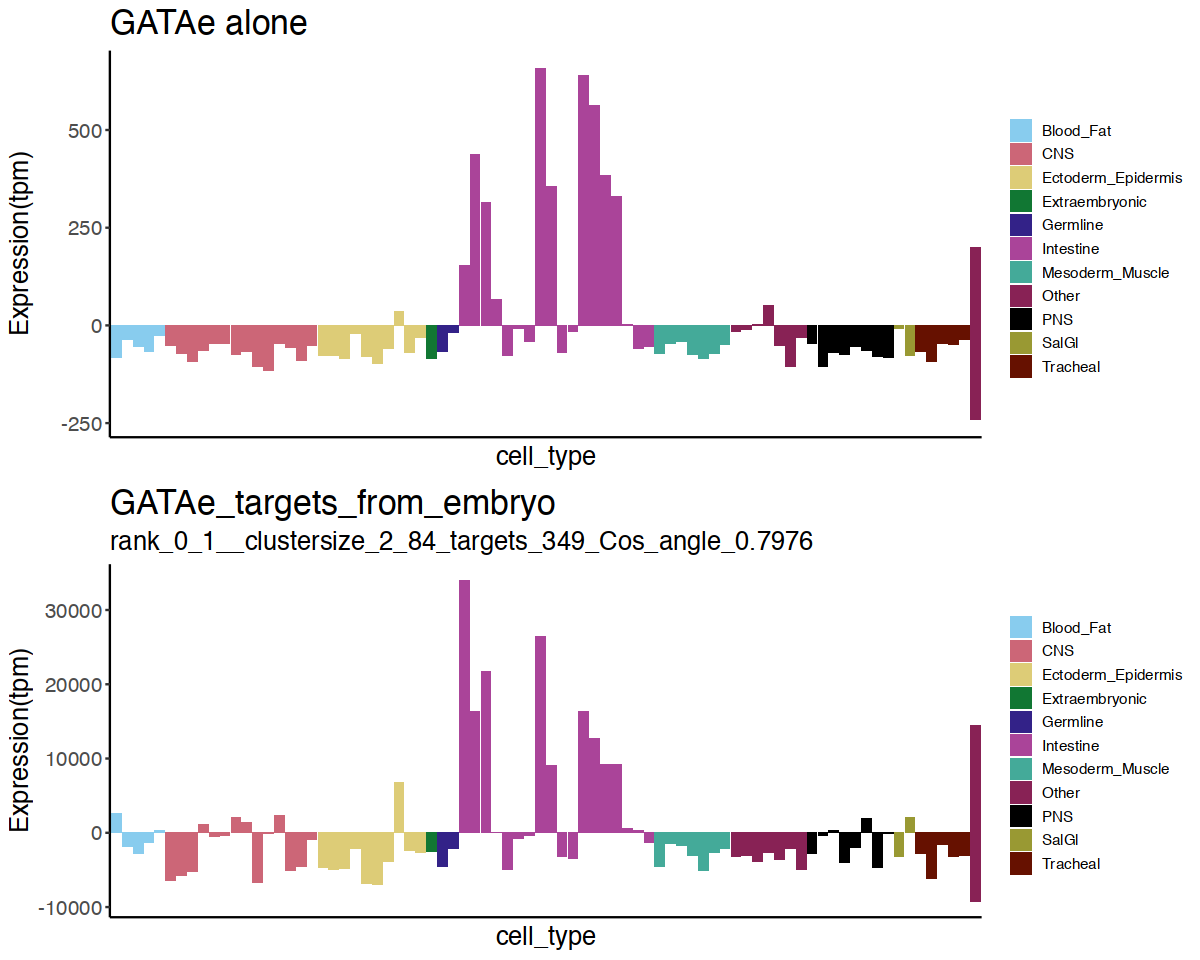

In [68]:
gg_both

In [69]:
    pdf("figures/Figure_6b_fly_GATAe_aggregate_plot.pdf", width = 10, height = 8)
print(gg_both)
dev.off()

png("figures/Figure_6b_fly_GATAe_aggregate_plot.png", width = 1000, height = 800)
print(gg_both)
dev.off()

jpeg("figures/Figure_6b_fly_GATAe_aggregate_plot.jpg", width = 1000, height = 800)
print(gg_both)
dev.off()

pdf 
  2

pdf 
  2

pdf 
  2

In [58]:
gen = "su(Hw)"

In [61]:
tf = gen

message(tf)
    
    file_name = paste(tf, "aggreg_vs_TF_profile","jpg", sep = ".")
    file_name = paste("worm_agg_emb_graphs_emb_targets", file_name, sep = "/")

            
          
tfn = gsub("-", "_", tf)
    
## set the rank limits
ranklb = 0
rankub = 1
## set the cluster size range
lb = 2
ub = 84
target_set = unique((fly_peaks_TF  %>% 
                            filter(TF == tf & 
                                   rank >= ranklb & rank <=rankub & 
                                   nPeaks > lb  & nPeaks <= ub
                                  & Gene != tf 
                                   & grepl("emb", exp)
                                   & !(Gene %in% c(gt602genes, gt277lte602genes))
                                  ))$Gene)
            number_targets = length(target_set)
            print(number_targets)
    
#if(number_targets > 1){
sub_mat = exp_matrix_fly_mean[ rownames(exp_matrix_fly_mean) %in% target_set,  ]
agg_totals = t(as.matrix(colSums(sub_mat)))
rownames(agg_totals) = c("TF_agg")
ta = as.data.frame(t(agg_totals))
tar = rownames_to_column(ta, var = "cell.type")
colnames(tar) <- c("cell.type", "expr")

    tar$cell.type = factor(tar$cell.type, levels = (c(reorder_column_names)))

    
tf_values = exp_matrix_fly_mean  %>% as.data.frame  %>% filter(rownames(exp_matrix_fly_mean) == tf)
t_tf_values = as.data.frame(t(tf_values))    
# title = paste(target, "_from_embryo", sep = "_")  
t_tf_values_row = rownames_to_column(t_tf_values, var = "cell.type")
 colnames(t_tf_values_row) <- c("cell.type", "expr")

t_tf_values_row$cell.type = factor(t_tf_values_row$cell.type, levels = (c(reorder_column_names)))

        compare = rbind(tf_values, agg_totals)
    angle = round(angleCosine(as.numeric(compare[1,]),as.numeric(compare[2,])), 4)


title_agg = paste(tfn, "targets_from_embryo", sep = "_")
agg_subtitle = paste("rank", ranklb, rankub, "_clustersize", lb, ub, "targets", number_targets, "Cos_angle", angle, sep = "_" ) 
#agg_subtitle = paste("max", target_max, "target_mean", target_mean, "target_entropy", target_entropy,  sep = "_" )    
gg_agg = ggplot(tar, aes(x = cell.type, y = expr, fill = 
                                        ifelse(cell.type %in% Blood_Fat, "Blood_Fat", 
                                               ifelse(cell.type %in% CNS, "CNS", 
                                                ifelse(cell.type %in% Ectoderm_Epidermis, "Ectoderm_Epidermis", 
                                                       ifelse(cell.type %in% Extraembryonic, "Extraembryonic",
                                                              ifelse(cell.type %in% Germline, "Germline",
                                                                     ifelse(cell.type %in% Intestine, "Intestine",
                                                                            ifelse(cell.type %in% Mesoderm_Muscle, "Mesoderm_Muscle",
                                                                                   ifelse(cell.type %in% PNS, "PNS",
                                                                                          ifelse(cell.type %in% SalGl, "SalGl",
                                                                                                 ifelse(cell.type %in% Tracheal, "Tracheal",
                                                                                                         "Other"))))))))))))  +
# ggtitle(title, agg_subtitle) +
theme_classic() +
     labs(title=title_agg, subtitle = agg_subtitle, x= "cell_type", y = "Expression(tpm)") +
theme(axis.text.x = element_blank(), axis.ticks.x=element_blank(), legend.key.size = unit(0.5, 'cm'),
         legend.title=element_blank() , plot.title = element_text(hjust = 0, size = 20),
      plot.subtitle = element_text(hjust = 0, size = 15),
         axis.title = element_text(size = 15), axis.text = element_text(size = 12)) +
scale_fill_manual(values = cbbPalette12a) +
# theme(axis.text.x= element_text(size = 0.1,angle = -90, hjust = 0)) +
 geom_bar(stat="identity")


    tf_title = paste(tf, "alone", sep = " ")

#    tf_subtitle = paste ("max", tf_max, "tf_mean", tf_mean, "tf_entropy", tf_entropy,  sep = "_")
gg_tf = ggplot(t_tf_values_row, aes(x = cell.type, y = expr, fill = 
                                        ifelse(cell.type %in% Blood_Fat, "Blood_Fat", 
                                               ifelse(cell.type %in% CNS, "CNS", 
                                                ifelse(cell.type %in% Ectoderm_Epidermis, "Ectoderm_Epidermis", 
                                                       ifelse(cell.type %in% Extraembryonic, "Extraembryonic",
                                                              ifelse(cell.type %in% Germline, "Germline",
                                                                     ifelse(cell.type %in% Intestine, "Intestine",
                                                                            ifelse(cell.type %in% Mesoderm_Muscle, "Mesoderm_Muscle",
                                                                                   ifelse(cell.type %in% PNS, "PNS",
                                                                                          ifelse(cell.type %in% SalGl, "SalGl",
                                                                                                 ifelse(cell.type %in% Tracheal, "Tracheal",
                                                                                                         "Other"
                                                                                                        ))))))))))))  +
    theme_classic() +
    labs(title=tf_title, x= "cell_type", y = "Expression(tpm)") +
theme(axis.text.x = element_blank(), axis.ticks.x=element_blank(), legend.key.size = unit(0.5, 'cm'),
         legend.title=element_blank(), plot.title = element_text(hjust = 0, size = 20),
         axis.title = element_text(size = 15), axis.text = element_text(size = 12)) +
#theme(axis.text.x= element_text(size = 9,angle = -90, hjust = 0)) +
scale_fill_manual(values = cbbPalette12a) +
  geom_bar(stat="identity") + ggtitle(tf_title)

#jpeg("test.jpg", width =1100, height = 1100)
    gg_both = plot_grid( gg_tf, gg_agg,             # Draw grid of plots
          ncol = 1,
          #rel_heights = c(1,1),
          align = "v")

su(Hw)



[1] 1051


In [1]:
gg_both

ERROR: Error in eval(expr, envir, enclos): object 'gg_both' not found


In [70]:
figure6_fly_function = function(fly_peaks_TF){
   # get bootstrap matrix
    exp_matrix_boot = read_tsv("data/cds_fly_pca300_vers3.final.annotation.bootstrapTPM.tsv")
    # fix the gene names
    peak_matrix_ids = readRDS("data/fly_gene_name_translations.rds")
    exp_matrix = left_join(exp_matrix_boot, peak_matrix_ids %>% select(Submitted_ID_matrix, FBID_key_matrix, Submitted_ID_peak), 
          by = c("Gene" = "Submitted_ID_matrix"))
    exp_matrix = exp_matrix  %>% mutate(Submitted_combined = 
                            ifelse(is.na(exp_matrix$Submitted_ID_peak), Gene, Submitted_ID_peak)) 
    exp_matrix = column_to_rownames(exp_matrix, var = "Submitted_combined")

    exp_matrix$Submitted_ID_peak = NULL
    exp_matrix$FBID_key_matrix = NULL
    exp_matrix$Gene = NULL
    
    exp_matrix_mean <-t(apply(exp_matrix,1, function(x) x - mean(x)))
   
    # get the fly peaks file and add the rank to the TF that had parens
    fly_peaks_TF = readRDS( "data/fly_peaks_TF_names_fixed.rds")
    peak_signal = readRDS("FlySignalRank.rds")                          
    fly_peaks_TF$rank = NULL
    fly_peaks_TF = fly_peaks_TF %>% left_join(peak_signal, by= "peakID")  
     # set up colors                         
    cbbPalette12a = c("#88CCEE", "#CC6677", "#DDCC77", "#117733", "#332288", "#AA4499", "#44AA99",
                 "#882255", "#000000",  "#999933", "#661100","#6699CC")
    cbbPalette <- c( "#D55E00", "#E69F00", "#56B4E9", 
                 "#F0E442", "#009E73", "#0072B2",  "#000000", "#CC79A7",  "#66CC99")  
    ## Get the targets of HOT sites
                              ### save the matrix
    temp = exp_matrix_mean
    load("data/fly_files_for_Angles.RData")
    ## remove this from abovebecause it is not the bootstrap corrected
    rm(exp_matrix_fly_mean)
    exp_matrix_fly_mean = exp_matrix_mean
                              
    # Get the classes and add them
    classes = read_tsv("fly_cell.type.3_with_broad cell class.txt")
    classes = classes  %>% select(cell.type.3.copy, Organ_system_11_collapsed_terms)  %>% 
    rename("cell.type.3" = "cell.type.3.copy", "broad_class" = "Organ_system_11_collapsed_terms")

    Blood_Fat = (classes  %>% filter(broad_class == "Blood_Fat"))$cell.type.3
    CNS = (classes  %>% filter(broad_class == "CNS"))$cell.type.3
    Ectoderm_Epidermis = (classes  %>% filter(broad_class == "Ectoderm_Epidermis"))$cell.type.3
    Extraembryonic = (classes  %>% filter(broad_class == "Extraembryonic"))$cell.type.3
    Germline = (classes  %>% filter(broad_class == "Germline"))$cell.type.3
    Intestine = (classes  %>% filter(broad_class == "Intestine"))$cell.type.3
    Mesoderm_Muscle = (classes  %>% filter(broad_class == "Mesoderm_Muscle"))$cell.type.3
    PNS = (classes  %>% filter(broad_class == "PNS"))$cell.type.3
    SalGl = (classes  %>% filter(broad_class == "SalGl"))$cell.type.3
    Tracheal = (classes  %>% filter(broad_class == "Tracheal"))$cell.type.3
    Other = (classes  %>% filter(broad_class == "Other"))$cell.type.3

    reorder_column_names = (classes  %>% filter(!is.na(cell.type.3))  %>% arrange(broad_class))$cell.type.3

    angleCosine <- function(v1,v2){
      dp <- v1 %*% v2
      dp <- dp / (sqrt(sum(v1^2))*sqrt(sum(v2^2)))
      return(dp)
        }
    # set the figure size
    options(repr.plot.width=10, repr.plot.height=8)
    #Make the figure
    gen = "GATAe"
    tf = gen

    message(tf)

        file_name = paste(tf, "aggreg_vs_TF_profile","jpg", sep = ".")
        file_name = paste("worm_agg_emb_graphs_emb_targets", file_name, sep = "/")



    tfn = gsub("-", "_", tf)

    ## set the rank limits
    ranklb = 0
    rankub = 1
    ## set the cluster size range
    lb = 2
    ub = 84
    target_set = unique((fly_peaks_TF  %>% 
                                filter(TF == tf & 
                                       rank >= ranklb & rank <=rankub & 
                                       nPeaks > lb  & nPeaks <= ub
                                      & Gene != tf 
                                       & grepl("emb", exp)
                                       & !(Gene %in% c(gt602genes, gt277lte602genes))
                                      ))$Gene)
                number_targets = length(target_set)
                print(number_targets)

    #if(number_targets > 1){
    sub_mat = exp_matrix_fly_mean[ rownames(exp_matrix_fly_mean) %in% target_set,  ]
    agg_totals = t(as.matrix(colSums(sub_mat)))
    rownames(agg_totals) = c("TF_agg")
    ta = as.data.frame(t(agg_totals))
    tar = rownames_to_column(ta, var = "cell.type")
    colnames(tar) <- c("cell.type", "expr")

        tar$cell.type = factor(tar$cell.type, levels = (c(reorder_column_names)))


    tf_values = exp_matrix_fly_mean  %>% as.data.frame  %>% filter(rownames(exp_matrix_fly_mean) == tf)
    t_tf_values = as.data.frame(t(tf_values))    
    # title = paste(target, "_from_embryo", sep = "_")  
    t_tf_values_row = rownames_to_column(t_tf_values, var = "cell.type")
     colnames(t_tf_values_row) <- c("cell.type", "expr")

    t_tf_values_row$cell.type = factor(t_tf_values_row$cell.type, levels = (c(reorder_column_names)))

            compare = rbind(tf_values, agg_totals)
        angle = round(angleCosine(as.numeric(compare[1,]),as.numeric(compare[2,])), 4)


    title_agg = paste(tfn, "targets_from_embryo", sep = "_")
    agg_subtitle = paste("rank", ranklb, rankub, "_clustersize", lb, ub, "targets", number_targets, "Cos_angle", angle, sep = "_" ) 
    #agg_subtitle = paste("max", target_max, "target_mean", target_mean, "target_entropy", target_entropy,  sep = "_" )    
    gg_agg = ggplot(tar, aes(x = cell.type, y = expr, fill = 
                                            ifelse(cell.type %in% Blood_Fat, "Blood_Fat", 
                                                   ifelse(cell.type %in% CNS, "CNS", 
                                                    ifelse(cell.type %in% Ectoderm_Epidermis, "Ectoderm_Epidermis", 
                                                           ifelse(cell.type %in% Extraembryonic, "Extraembryonic",
                                                                  ifelse(cell.type %in% Germline, "Germline",
                                                                         ifelse(cell.type %in% Intestine, "Intestine",
                                                                                ifelse(cell.type %in% Mesoderm_Muscle, "Mesoderm_Muscle",
                                                                                       ifelse(cell.type %in% PNS, "PNS",
                                                                                              ifelse(cell.type %in% SalGl, "SalGl",
                                                                                                     ifelse(cell.type %in% Tracheal, "Tracheal",
                                                                                                             "Other"))))))))))))  +
    # ggtitle(title, agg_subtitle) +
    theme_classic() +
         labs(title=title_agg, subtitle = agg_subtitle, x= "cell_type", y = "Expression(tpm)") +
    theme(axis.text.x = element_blank(), axis.ticks.x=element_blank(), legend.key.size = unit(0.5, 'cm'),
             legend.title=element_blank() , plot.title = element_text(hjust = 0, size = 20),
          plot.subtitle = element_text(hjust = 0, size = 15),
             axis.title = element_text(size = 15), axis.text = element_text(size = 12)) +
    scale_fill_manual(values = cbbPalette12a) +
    # theme(axis.text.x= element_text(size = 0.1,angle = -90, hjust = 0)) +
     geom_bar(stat="identity")


        tf_title = paste(tf, "alone", sep = " ")

    #    tf_subtitle = paste ("max", tf_max, "tf_mean", tf_mean, "tf_entropy", tf_entropy,  sep = "_")
    gg_tf = ggplot(t_tf_values_row, aes(x = cell.type, y = expr, fill = 
                                            ifelse(cell.type %in% Blood_Fat, "Blood_Fat", 
                                                   ifelse(cell.type %in% CNS, "CNS", 
                                                    ifelse(cell.type %in% Ectoderm_Epidermis, "Ectoderm_Epidermis", 
                                                           ifelse(cell.type %in% Extraembryonic, "Extraembryonic",
                                                                  ifelse(cell.type %in% Germline, "Germline",
                                                                         ifelse(cell.type %in% Intestine, "Intestine",
                                                                                ifelse(cell.type %in% Mesoderm_Muscle, "Mesoderm_Muscle",
                                                                                       ifelse(cell.type %in% PNS, "PNS",
                                                                                              ifelse(cell.type %in% SalGl, "SalGl",
                                                                                                     ifelse(cell.type %in% Tracheal, "Tracheal",
                                                                                                             "Other"
                                                                                                            ))))))))))))  +
        theme_classic() +
        labs(title=tf_title, x= "cell_type", y = "Expression(tpm)") +
    theme(axis.text.x = element_blank(), axis.ticks.x=element_blank(), legend.key.size = unit(0.5, 'cm'),
             legend.title=element_blank(), plot.title = element_text(hjust = 0, size = 20),
             axis.title = element_text(size = 15), axis.text = element_text(size = 12)) +
    #theme(axis.text.x= element_text(size = 9,angle = -90, hjust = 0)) +
    scale_fill_manual(values = cbbPalette12a) +
      geom_bar(stat="identity") + ggtitle(tf_title)

    #jpeg("test.jpg", width =1100, height = 1100)
        gg_both = plot_grid( gg_tf, gg_agg,             # Draw grid of plots
              ncol = 1,
              #rel_heights = c(1,1),
              align = "v")
    # save the pdf's etc
    pdf("figures/Figure_6b_fly_GATAe_aggregate_plot.pdf", width = 10, height = 8)
    print(gg_both)
    dev.off()

    png("figures/Figure_6b_fly_GATAe_aggregate_plot.png", width = 1000, height = 800)
    print(gg_both)
    dev.off()

    jpeg("figures/Figure_6b_fly_GATAe_aggregate_plot.jpg", width = 1000, height = 800)
    print(gg_both)
    dev.off()
                              
}

In [77]:
save(exp_matrix, exp_matrix_fly_mean, fly_peaks_TF, cbbPalette12a, cbbPalette, gt602genes, gt277lte602genes,
       classes, reorder_column_names, angleCosine, figure6_fly_function, 
        file = "data/fly_figure_6b_TF_targets.RData")

In [71]:
saveRDS(fly_peaks_TF, "data/fly_peaks_TF_names_fixed_with_rank.rds")

In [74]:
ls()

[1] "agg_subtitle"         "agg_totals"           "angle"               
 [4] "angleCosine"          "Blood_Fat"            "cbbPalette"          
 [7] "cbbPalette12a"        "classes"              "CNS"                 
[10] "compare"              "Ectoderm_Epidermis"   "exp_matrix"          
[13] "exp_matrix_boot"      "exp_matrix_fly_mean"  "exp_matrix_mean"     
[16] "Extraembryonic"       "figure6_fly_function" "file_name"           
[19] "fly_peaks_TF"         "fly_TF_targets"       "gen"                 
[22] "Germline"             "gg_agg"               "gg_both"             
[25] "gg_tf"                "gt277lte602genes"     "gt602genes"          
[28] "Intestine"            "lb"                   "Mesoderm_Muscle"     
[31] "number_targets"       "Other"                "peak_matrix_ids"     
[34] "peak_signal"          "PNS"                  "ranklb"              
[37] "rankub"               "reorder_column_names" "SalGl"               
[40] "sub_mat"              "t_tf_values"          "t_tf_values_row"     
[43] "ta"                   "tar"                  "target_set"          
[46] "temp"                 "tf"                   "tf_title"            
[49] "tf_values"            "tfn"                  "title_agg"           
[52] "Tracheal"             "ub"